# Conversational AI: Natural Language Processing (UCS664)
# Assignment-2(a)

Suvrat Arora <br>
101903331 <br>
3CO13 <br>

**Q1: In the news genre of brown corpus, find the count of the words starting with wh, such as what,  when, where, who and why?** 

In [3]:
from nltk.corpus import brown
l=[w for w in brown.words(categories=['news']) if w[0:2]=='wh']
l

['which',
 'which',
 'which',
 'which',
 'which',
 'which',
 'which',
 'when',
 'who',
 'which',
 'who',
 'whether',
 'which',
 'which',
 'who',
 'where',
 'what',
 'which',
 'whether',
 'whether',
 'which',
 'who',
 'who',
 'which',
 'who',
 'which',
 'which',
 'which',
 'which',
 'when',
 'which',
 'why',
 'which',
 'whipped',
 'which',
 'who',
 'which',
 'who',
 'what',
 'which',
 'when',
 'who',
 'where',
 'which',
 'who',
 'who',
 'who',
 'which',
 'when',
 'when',
 'while',
 'when',
 'whom',
 'who',
 'who',
 'which',
 'who',
 'whereby',
 'who',
 'who',
 'who',
 'who',
 'who',
 'who',
 'who',
 'where',
 'who',
 'who',
 'which',
 'where',
 'whole',
 'wherever',
 'when',
 'which',
 'what',
 'whether',
 'why',
 'which',
 'which',
 'whom',
 'who',
 'what',
 'where',
 'what',
 'where',
 'which',
 'which',
 'when',
 'whom',
 'when',
 'who',
 'when',
 'which',
 'who',
 'what',
 'which',
 'which',
 'while',
 'when',
 'what',
 'which',
 'what',
 'who',
 'when',
 'what',
 'while',
 'what',


**Q2: Find the conditional frequency distribution of modals ['can', 'could', 'may', 'might', 'must', 'will']  in all the categories of brown corpus?**

In [14]:
brown_cfd = nltk.ConditionalFreqDist([ (genre, word.lower()) for genre in brown.categories() for word in brown.words(categories=genre) ])

brown_cfd.tabulate(conditions =brown.categories(),samples = ['can', 'could', 'may', 'might', 'must', 'will'])

                  can could   may might  must  will 
      adventure    48   154     7    59    27    51 
 belles_lettres   249   216   221   113   171   246 
      editorial   124    57    79    39    55   235 
        fiction    39   168    10    44    55    56 
     government   119    38   179    13   102   244 
        hobbies   276    59   143    22    84   269 
          humor    17    33     8     8     9    13 
        learned   367   159   336   128   203   340 
           lore   170   142   170    50    96   178 
        mystery    45   145    15    57    31    25 
           news    94    87    93    38    53   389 
       religion    84    59    79    12    54    72 
        reviews    45    40    47    26    19    61 
        romance    79   195    11    51    46    49 
science_fiction    16    49     4    12     8    17 


**Q3: Find the year out of the filenames in the Inaugural Address Corpus?** 


In [11]:
from nltk.corpus import inaugural
years=[]
for i in range(0,len(inaugural.fileids())):
    years.append(inaugural.fileids()[i][0:4])
    
years

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

**Q4: Read in the texts of the State of the Union addresses, using the state_union corpus reader.  Count occurrences of men , women , and people in each document. What has happened to the usage  of these words over time?** 


In [38]:
from nltk.corpus import state_union
import pandas as pd

df = pd.DataFrame(columns = ['Document Name','Men_Count','Women_Count','People_Count'])

for i in range(0,len(state_union.fileids())):
    men_count=0
    women_count=0
    people_count=0
    for w in state_union.words(state_union.fileids()[i]):
        if w.lower() == 'men':
            men_count=men_count+1
        if w.lower() == 'women':
            women_count=women_count+1
        if w.lower() == 'people':
            people_count=people_count+1

    df=df.append({'Document Name':state_union.fileids()[i], 'Men_Count': men_count, 'Women_Count': women_count,'People_Count': people_count},ignore_index=True)
    
df

,Document Name,Men_Count,Women_Count,People_Count
0,1945-Truman.txt,2,2,10
1,1946-Truman.txt,12,7,49
2,1947-Truman.txt,7,2,12
3,1948-Truman.txt,5,1,22
4,1949-Truman.txt,2,1,15
...,...,...,...,...
60,2002-GWBush.txt,3,6,14
61,2003-GWBush.txt,6,4,33
62,2004-GWBush.txt,7,8,21
63,2005-GWBush.txt,8,11,18


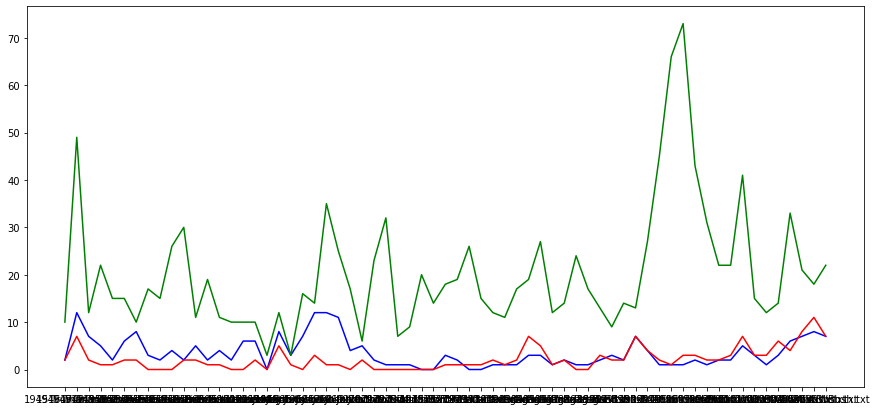

In [52]:
#Visualizing the usage of words over time 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(df['Document Name'], df['Men_Count'], color='blue',label='men')
plt.plot(df['Document Name'], df['Women_Count'], color='red',label='women')
plt.plot(df['Document Name'], df['People_Count'], color='green',label='people')

**Q6: Write a program to find all words that occur at least three times in the Brown Corpus.** 


In [15]:
all_unique_words_brown=set(brown.words())
brown_fd=nltk.FreqDist(brown.words())
atleast_3times=[word for word in all_unique_words_brown if brown_fd[word]>2]
print(atleast_3times)

['abandoned', 'resistance', 'outward', 'diameters', 'east-west', 'Adjustment', 'streams', 'vital', 'philosophers', 'ratio', 'Sound', 'random', 'one-inch', 'uneconomical', 'Gin', '1882', 'trousers', 'tantalizing', 'Discourse', "mind's", 'resumed', 'Captain', 'Get', 'frozen', 'Projects', 'settings', 'pouring', 'Closely', 'drastically', 'Sabella', 'slender', 'Millie', 'Gene', 'emergence', 'physics', 'symphonies', 'sparkle', 'Imperial', 'safely', 'Herb', 'communication', 'cars', 'Junction', 'canned', 'rounding', 'hundreds', 'stir', 'will', "Spencer's", 'theories', 'arousing', 'graves', 'Pennsylvania', 'derby', 'champagne', 'Robbie', 'dogs', 'paintings', 'draw', 'Heavenly', 'Close', 'reformation', 'privileged', 'request', 'Thursday', 'Guess', 'yoke', 'contribution', 'Viscount', 'correlated', 'splashed', 'customs', 'illustration', 'Augusta', 'bottles', 'cartoonist', "parents'", 'churches', 'chord', 'Linda', 'freshmen', "car's", 'candid', 'marines', 'consummated', '69', 'Circuit', 'viable', '

**Q7: Write a program to generate a table of lexical diversity scores (i.e., token/type ratios) for each  genre. Include the full set of Brown Corpus genres ( nltk.corpus.brown.categories() ). Which genre  has the lowest diversity**

In [16]:
from nltk.corpus import brown
d={}
for i in range(0,len(brown.categories())):
    lex=len(set(brown.words(categories=brown.categories()[i])))/len(brown.words(categories=brown.categories()[i]))
    print('Lexical Diversity of ',brown.categories()[i],' ',lex)
    d[brown.categories()[i]]=lex
    
min_value = min(d.values())
key = [k for k in d.keys() if d[k]==min_value]
print("Minimum Lexical Diversity is of ",key," genre with value = ",min_value)

Lexical Diversity of  adventure   0.1279743878169075
Lexical Diversity of  belles_lettres   0.10642071451679992
Lexical Diversity of  editorial   0.16054152327770924
Lexical Diversity of  fiction   0.1358194136199042
Lexical Diversity of  government   0.11667641228232811
Lexical Diversity of  hobbies   0.14493897625842492
Lexical Diversity of  humor   0.23125144042406084
Lexical Diversity of  learned   0.09268890745953554
Lexical Diversity of  lore   0.13148804612915801
Lexical Diversity of  mystery   0.12212912592488936
Lexical Diversity of  news   0.14314696580941583
Lexical Diversity of  religion   0.1617553745018909
Lexical Diversity of  reviews   0.21192020440251572
Lexical Diversity of  romance   0.12070492131044529
Lexical Diversity of  science_fiction   0.22342778161713892
Minimum Lexical Diversity is of  ['learned']  genre with value =  0.09268890745953554


**Q8: Write a function that finds the 50 most frequently occurring words of a text?**


In [6]:
def freq_fifty(text):
    stopwords = nltk.corpus.stopwords.words('english')
    clean_list = [w for w in text if w.lower() not in stopwords] 
    freqdist = nltk.probability.FreqDist(clean_list)
    l=list(freqdist.keys())
    return l[0:50]

import nltk
from nltk.corpus import brown
text=brown.words()

a=freq_fifty(text)
print(a)

['Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'investigation', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'evidence', "''", 'irregularities', 'took', 'place', '.', 'jury', 'term-end', 'presentments', 'City', 'Executive', 'Committee', ',', 'over-all', 'charge', 'deserves', 'praise', 'thanks', 'Atlanta', 'manner', 'conducted', 'September-October', 'term', 'charged', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'investigate', 'reports', 'possible', 'hard-fought', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.']
